In [43]:
from urllib.request import urlopen
import numpy as np
linkin = "http://www.amlbook.com/data/zip/features.train"

linkout="http://www.amlbook.com/data/zip/features.test"


def getline(line):
    q=line.rstrip()
    q=q.decode()
    q=q.split()
    qq=[float(i) for i in q]
    return(qq)
stop=0
lpts=[]
lrealdigs=[]
vouts=[]
vpts=[]
inerrs=[]
valerrs=[]
lptstrans=[]
tptstrans=[]
f = urlopen(linkin)
stop=0
tpts=[]
trealdigs=[]
terrs=[]
while not(stop):
    myline = f.readline()
    if len(myline)<1:
        stop=1
    else:
        a=getline(myline)
        lpts.append([1,a[1],a[2]])
        lptstrans.append([1,a[1],a[2],a[1]**2,a[2]**2,a[1]*a[2]])
        lrealdigs.append(a[0])
# OUT data:
f = urlopen(linkout)

stop=0
tpts=[]
touts=[]
terrs=[]
while not(stop):
    myline = f.readline()
    if len(myline)<1:
        stop=1
    else:
        a=getline(myline)
        tpts.append([1,a[1],a[2]])
        trealdigs.append(a[0])
        tptstrans.append([1,a[1],a[2],a[1]**2,a[2]**2,a[1]*a[2]])

In [88]:
def onevone(dig1,dig2,gamma):
    transformed=1
    louts=np.ones(len(lrealdigs))*0
    
    inds1=np.argwhere(np.array(lrealdigs)==dig1)
    louts[inds1]+=1
    inds2=np.argwhere(np.array(lrealdigs)==dig2)
    louts[inds2]+=-1
#     lnewpts=[lpts[i] for i in range(len(lpts)) if (i in inds1) or (i in inds2) ]
    if transformed:
        lnewpts=[lptstrans[i] for i in range(len(lptstrans)) if (i in inds1) or (i in inds2) ]
    else:          
        lnewpts=[lpts[i] for i in range(len(lpts)) if (i in inds1) or (i in inds2) ]
    lnewouts=[louts[i] for i in range(len(lpts)) if (i in inds1) or (i in inds2)]
    print(lnewpts[0])
    touts=np.ones(len(trealdigs))*0
    inds1=np.argwhere(np.array(trealdigs)==dig1)
    touts[inds1]+=1
    inds2=np.argwhere(np.array(trealdigs)==dig2)
    touts[inds2]+=-1
#     tnewpts=[tpts[i] for i in range(len(tpts)) if (i in inds1) or (i in inds2) ]
    if transformed:
        tnewpts=[tptstrans[i] for i in range(len(tptstrans)) if (i in inds1) or (i in inds2) ]
    else:          
        tnewpts=[tpts[i] for i in range(len(tpts)) if (i in inds1) or (i in inds2) ]
    tnewouts=[touts[i] for i in range(len(tpts)) if (i in inds1) or (i in inds2)]
    tnewouts=[touts[i] for i in range(len(tpts)) if (i in inds1) or (i in inds2)]
    
    
    X=np.matrix(lnewpts)
    S=X.transpose()
    Xpinv=np.linalg.inv(np.add(S*X,np.identity(len(X[0]))*gamma))
    Zvec=np.inner(Xpinv*S,lnewouts)
    W=np.array(Zvec)
    
    train_output=[np.array(np.inner(X[i],W)) for i in range(len(X))]
    booli=[-1+2*(train_output[i]>0) for i in range(len(train_output))]
    compare=[booli[i]==lnewouts[i] for i in range (len(lnewouts))]
    inerr=1-(np.array(compare).sum()/len(compare))
    print(inerr)
#     print(train_output[0:10])
#     print(lnewouts[0:10])
    X=np.matrix(tnewpts)
    test_output=[np.array(np.inner(X[i],W)) for i in range(len(X))]
    booli=[-1+2*(test_output[i]>0) for i in range(len(test_output))]
    compare=[booli[i]==tnewouts[i] for i in range (len(tnewouts))]
    outerr=1-(np.array(compare).sum()/len(compare))
    return inerr,outerr
def onevall(dig1):
    transformed=0
    gamma=1
    louts=np.ones(len(lrealdigs))*0
    
    inds1=np.argwhere(np.array(lrealdigs)==dig1)
    louts[inds1]+=1
    inds2=np.argwhere(np.array(lrealdigs)!=dig1)
    louts[inds2]+=-1
    if transformed:
        lnewpts=[lptstrans[i] for i in range(len(lptstrans)) if (i in inds1) or (i in inds2) ]
    else:          
        lnewpts=[lpts[i] for i in range(len(lpts)) if (i in inds1) or (i in inds2) ]
        
    lnewouts=[louts[i] for i in range(len(lpts)) if (i in inds1) or (i in inds2)]
    print(lnewpts[0])
    touts=np.ones(len(trealdigs))*0
    inds1=np.argwhere(np.array(trealdigs)==dig1)
    touts[inds1]+=1
    inds2=np.argwhere(np.array(trealdigs)!=dig1)
    touts[inds2]+=-1
    if transformed:
        tnewpts=[tptstrans[i] for i in range(len(tptstrans)) if (i in inds1) or (i in inds2) ]
    else:          
        tnewpts=[tpts[i] for i in range(len(tpts)) if (i in inds1) or (i in inds2) ]
    tnewouts=[touts[i] for i in range(len(tpts)) if (i in inds1) or (i in inds2)]
    
    
    X=np.matrix(lnewpts)
    S=X.transpose()
    Xpinv=np.linalg.inv(np.add(S*X,np.identity(len(X[0]))*gamma))
    Zvec=np.inner(Xpinv*S,lnewouts)
    W=np.array(Zvec)
    
    train_output=[np.array(np.inner(X[i],W)) for i in range(len(X))]
    booli=[-1+2*(train_output[i]>0) for i in range(len(train_output))]
    compare=[booli[i]==lnewouts[i] for i in range (len(lnewouts))]
    inerr=1-(np.array(compare).sum()/len(compare))
    print(inerr)
#     print(train_output[0:10])
#     print(lnewouts[0:10])
    X=np.matrix(tnewpts)
    test_output=[np.array(np.inner(X[i],W)) for i in range(len(X))]
    booli=[-1+2*(test_output[i]>0) for i in range(len(test_output))]
    compare=[booli[i]==tnewouts[i] for i in range (len(tnewouts))]
    outerr=1-(np.array(compare).sum()/len(compare))
    return inerr,outerr

In [60]:
iners=[]
outers=[]
for i in np.arange(0,10):
    print(i)
    ine,oute=onevall(i)
    iners.append(ine)
    outers.append(oute)

0
[1, 0.3410918, -4.5289375]
0.10890138526951032
1
[1, 0.3410918, -4.5289375]
0.015224249074201057
2
[1, 0.3410918, -4.5289375]
0.10026059525442321
3
[1, 0.3410918, -4.5289375]
0.09024825126868741
4
[1, 0.3410918, -4.5289375]
0.08942531888629812
5
[1, 0.3410918, -4.5289375]
0.07625840076807022
6
[1, 0.3410918, -4.5289375]
0.09107118365107669
7
[1, 0.3410918, -4.5289375]
0.08846523110684401
8
[1, 0.3410918, -4.5289375]
0.074338225209162
9
[1, 0.3410918, -4.5289375]
0.08832807570977919


In [61]:
untransformederrors=[iners,outers]

In [68]:
np.array(transformederrors[1])<np.array(transformederrors[0])

array([False, False,  True,  True, False, False,  True,  True, False,
        True])

In [82]:
np.array(untransformederrors[1])<np.array(transformederrors[1])

array([False, False, False, False, False, False, False, False, False,
       False])

In [92]:
ine,oute=onevone(1,5,.01)

[1, 0.44413086, -5.4968125, 0.1972522208043396, 30.21494766015625, -2.44130406288375]
0.004484304932735439


In [91]:
ine,oute

(0.005124919923126248, 0.028301886792452824)

In [93]:
ine,oute

(0.004484304932735439, 0.02594339622641506)

In [3]:
#Q11:
X=[[1,0],[0,1],[0,-1],[-1,0],[0,2],[0,-2],[-2,0]]
y=[-1,-1,-1,1,1,1,1]

In [95]:
Z=[[x[1]**2-2*x[0]-1,x[0]**2-2*x[1]+1] for x in X]

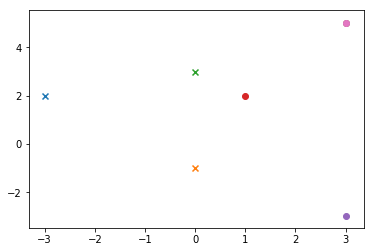

In [101]:
import matplotlib.pyplot as plt
cnt=0
for i in Z:
    if y[cnt]==1:
        plt.scatter(i[0],i[1],marker='o')
    else:
        plt.scatter(i[0],i[1],marker='x')
    cnt+=1
plt.show()


In [100]:
Z

[[-3, 2], [0, -1], [0, 3], [1, 2], [3, -3], [3, 5], [3, 5]]

In [23]:
import cvxopt
import numpy as np
from cvxopt import matrix
from cvxopt import solvers
mat=np.eye(len(X))
for i in range(len(X)):
    for j in range(len(X)):
        mat[i][j]=y[i]*y[j]*(1+np.dot(X[i],X[j]))**2
            
P=matrix(mat)

q=matrix(np.ones(len(y))*-1,tc='d')
A=matrix(np.matrix(y),tc='d')
# A=np.transpose(A)
bb=matrix(0,tc='d')
G=matrix(np.eye(len(X))*-1,tc='d')

h=matrix(np.ones(len(y))*0)
sol = solvers.qp(P,q,G,h,A,bb)
            

     pcost       dcost       gap    pres   dres
 0: -2.0644e+00 -4.5383e+00  2e+01  3e+00  2e+00
 1: -3.0994e+00 -4.4384e+00  5e+00  1e+00  6e-01
 2: -1.2189e+00 -2.0952e+00  9e-01  3e-16  7e-15
 3: -1.3986e+00 -1.4261e+00  3e-02  5e-16  1e-15
 4: -1.4073e+00 -1.4076e+00  3e-04  3e-16  9e-16
 5: -1.4074e+00 -1.4074e+00  3e-06  3e-16  9e-16
 6: -1.4074e+00 -1.4074e+00  3e-08  4e-16  5e-16
Optimal solution found.


In [24]:
aph=np.array(sol['x'])


In [91]:
#Q13
import random as rn
import numpy as np
def targetf(x1,x2):
    return  np.sign(x2-x1+0.25*np.sin(np.pi*x1))
def kmeans2d(X,k):
    
    centers=[[rn.random()*2-1,rn.random()*2-1] for i in range(k)]
    print(X[0])
    print(centers[0])
    def affiliate(X,loccenters):
        belong=np.zeros(len(X))
        for i in range (len(X)):
#             print(loccenters[0])
            distances=np.array([distance(X[i],loccenters[p]) for p in range(k)])
            belong[i]=np.where(distances==np.min(distances))[0]
        return belong
    def centerscalc(X,belongs):
        for i in range(k):
            relpts=X[belongs==i]
            if len(relpts)>0:
                centers[i]=np.average(relpts,0)
            else:
                centers[i]=[0,0]
        return centers
    def distance(a,b):
#         print(b)
        return np.sqrt((a[1]-b[1])**2+(a[0]-b[0])**2)
    go=1
    cnt2=0
    while go:
        cnt2+=1  
        belongings=affiliate(X,centers)

        centers=centerscalc(X,belongings)

        belongings2=affiliate(X,centers)
        if all(belongings==belongings2):
            go=0
    print(cnt2)
    return  belongings,centers      

    
    



In [47]:
npts=100
k=9
pts=np.array([[rn.random()*2-1,rn.random()*2-1] for i in range(npts)])
ys=[targetf(x,y) for x,y in pts]

bels,cn=kmeans2d(pts,k)
if not(np.all(np.isin(np.arange(0,9),bels))):
    raise Exception('spam')






[-0.22720652 -0.03606568]
[0.5874923081323433, -0.26972275900853604]


C:\Users\ra\Anaconda3\envs\ex7_8\lib\site-packages\numpy\lib\function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\ra\Anaconda3\envs\ex7_8\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


ValueError: setting an array element with a sequence.

In [35]:
np.isin(np.arange(0,9),bels)


array([ True,  True,  True, False,  True,  True,  True,  True,  True], dtype=bool)

In [190]:
import cvxopt
import numpy as np
import random as rn
from cvxopt import matrix
from cvxopt import solvers
svm_b=[]
npts=100
nptso=1000
neers2empt=0
neers1=0
kiner=[]
kouter=[]
SVOUTE=[]
k=9
def targetf(x1,x2):
    return  np.sign(x2-x1+0.25*np.sin(np.pi*x1))
def classifyr(ptt):
    sumi=0
    for i in range(len(svinds)):
        sumi+=alphas[svinds[i]]*ys[svinds[i]]*np.exp(-gamma*np.linalg.norm(ptt-pts[svinds[i]])**2) 
    yout=np.sign(sumi+theb)
    return yout
def classifykm(ppt,cns):
    xs=[]
    xs=[np.exp(-gamma*np.linalg.norm(ppt-cns[j])**2) for j in range(len(cns))]
    xs.insert(0,1)
#     print(xs)
#     print(W)
    return np.sign(np.dot(W,np.array(xs)))

for kk in range(300):
    try:
        pts=np.array([[rn.random()*2-1,rn.random()*2-1] for i in range(npts)])
        outpts=np.array([[rn.random()*2-1,rn.random()*2-1] for i in range(nptso)])
        ys=[targetf(x,y) for x,y in pts]
        yso=[targetf(x,y) for x,y in outpts]
        gamma=2

        bels,cn=kmeans2d(pts,k)




        if not(np.all(np.isin(np.arange(0,9),bels))):
            raise NameError('spam')
        mat=np.zeros((len(pts),len(cn)+1))
        for i in range(len(pts)):
            for j in range(len(cn)+1):
                if j==0:
                    mat[i][j]=1
                else:
                    mat[i][j]=np.exp(-gamma*np.linalg.norm(pts[i]-cn[j-1])**2)
        X=np.matrix(mat)
        S=np.transpose(X)
        Xpinv=np.linalg.pinv(np.matmul(S,X))
        XinvS=np.matmul(Xpinv,S)
#         phiy=np.matmul(S,ys)
        Z=np.matmul( XinvS,ys)
#         Z=np.matmul(Xpinv,phiy)
        W=np.array(Z)
        outsk=[classifykm(ppt,cn)[0] for ppt in pts]
        k_badscnt=sum(np.array(outsk)!=np.array(ys))/npts
        Eoutsk=[classifykm(ppt,cn)[0] for ppt in outpts]
        EOk_badscnt=sum(np.array(Eoutsk)!=np.array(yso))/nptso
        
        mat=np.eye(len(pts))
        kappa=np.eye(len(pts))
        for i in range(len(pts)):
            for j in range(len(pts)):
                mat[i][j]=ys[i]*ys[j]*np.exp(-gamma*np.linalg.norm(pts[i]-pts[j])**2)
                kappa[i][j]=np.exp(-gamma*np.linalg.norm(pts[i]-pts[j])**2)    
        P=matrix(mat)

        q=matrix(np.ones(len(ys))*-1,tc='d')
        A=matrix(np.matrix(ys),tc='d')
        # A=np.transpose(A)
        bb=matrix(0,tc='d')
        G=matrix(np.eye(len(pts))*-1,tc='d')

        h=matrix(np.ones(len(ys))*0)
        sol = solvers.qp(P,q,G,h,A,bb)
        alphas=np.array(sol['x'])
        svs=[]
        svinds=[]
        WSVM=[0,0]
        for i in range(len(alphas)):
            if alphas[i]>.5:
                svs.append(pts[i])
                WSVM=np.add(WSVM,np.multiply(pts[i],ys[i])*alphas[i])
                svinds.append(i)

        # theb=(ys[svinds[0]]*np.dot(WSVM,pts[svinds[0]])-1)/-outputs[svinds[0]]
        sumofmults=0
        for i in range(len(svinds)):
            sumofmults=sumofmults+alphas[svinds[i]]*ys[svinds[i]]*kappa[svinds[i],svinds[2]]
        theb=ys[svinds[2]]-sumofmults

        outs=[]
        outs=[classifyr(pt1)[0] for pt1 in pts]
        SV_badscnt=sum(np.array(outs)!=np.array(ys))/npts
        svm_b.append(SV_badscnt)
        outs=[]
        outs=[classifyr(pt1)[0] for pt1 in outpts]
        EOSV_badscnt=sum(np.array(outs)!=np.array(yso))/nptso
        
        kiner.append(k_badscnt)
        kouter.append(EOk_badscnt)
        SVOUTE.append(EOSV_badscnt)
    except ValueError as valer:
        print(valer)
        neers1+=1
    except NameError as namer:
        
        neers2empt+=1        
        print(namer)
        # plt.hist(alphas,50)
        SV_badscnt

[-0.52914583 -0.4110181 ]
[0.030041647782427683, -0.23899584863016843]
4
     pcost       dcost       gap    pres   dres
 0: -1.7459e+01 -5.2218e+01  3e+02  1e+01  2e+00
 1: -3.6344e+01 -7.6860e+01  1e+02  5e+00  1e+00
 2: -8.8903e+01 -1.3589e+02  1e+02  5e+00  9e-01
 3: -2.0172e+02 -2.6087e+02  1e+02  3e+00  5e-01
 4: -2.3677e+02 -2.7667e+02  7e+01  1e+00  2e-01
 5: -2.4149e+02 -2.5315e+02  2e+01  2e-01  4e-02
 6: -2.4383e+02 -2.4612e+02  3e+00  3e-02  5e-03
 7: -2.4474e+02 -2.4501e+02  3e-01  8e-05  2e-05
 8: -2.4497e+02 -2.4498e+02  1e-02  8e-07  2e-07
 9: -2.4498e+02 -2.4498e+02  1e-04  8e-09  2e-09
Optimal solution found.
[-0.41500981  0.43947344]
[0.7021062443117188, 0.46849095662901075]
5
     pcost       dcost       gap    pres   dres
 0: -2.7311e+01 -6.6415e+01  2e+02  1e+01  2e+00
 1: -7.0561e+01 -1.0414e+02  1e+02  6e+00  1e+00
 2: -1.6770e+02 -2.0339e+02  1e+02  6e+00  1e+00
 3: -6.8495e+02 -7.3316e+02  1e+02  6e+00  1e+00
 4: -1.8635e+03 -1.9921e+03  2e+02  6e+00  1e+00
 5

     pcost       dcost       gap    pres   dres
 0: -2.1837e+01 -5.8733e+01  3e+02  1e+01  2e+00
 1: -5.2785e+01 -8.8774e+01  1e+02  6e+00  1e+00
 2: -1.2513e+02 -1.6917e+02  1e+02  5e+00  1e+00
 3: -4.6264e+02 -5.7663e+02  2e+02  5e+00  9e-01
 4: -7.4200e+02 -8.9749e+02  2e+02  3e+00  5e-01
 5: -7.9237e+02 -8.9732e+02  1e+02  1e+00  2e-01
 6: -8.0751e+02 -8.1430e+02  9e+00  5e-02  9e-03
 7: -8.0802e+02 -8.0835e+02  4e-01  5e-04  9e-05
 8: -8.0826e+02 -8.0826e+02  4e-03  5e-06  9e-07
 9: -8.0826e+02 -8.0826e+02  4e-05  5e-08  9e-09
Optimal solution found.
[-0.74845676 -0.58076408]
[-0.06906690429494877, 0.283411723338008]
8
     pcost       dcost       gap    pres   dres
 0: -1.8031e+01 -5.3469e+01  3e+02  1e+01  2e+00
 1: -3.8131e+01 -7.8118e+01  1e+02  5e+00  1e+00
 2: -6.4576e+01 -1.0912e+02  1e+02  4e+00  9e-01
 3: -1.4350e+02 -1.8481e+02  1e+02  3e+00  5e-01
 4: -1.8587e+02 -2.2708e+02  9e+01  2e+00  3e-01
 5: -1.9265e+02 -1.9774e+02  1e+01  2e-01  3e-02
 6: -1.9186e+02 -1.9226e+0

5
     pcost       dcost       gap    pres   dres
 0: -1.9660e+01 -5.7928e+01  3e+02  1e+01  2e+00
 1: -4.0458e+01 -8.3808e+01  1e+02  5e+00  1e+00
 2: -1.0424e+02 -1.5128e+02  1e+02  4e+00  9e-01
 3: -2.8428e+02 -3.3856e+02  2e+02  4e+00  8e-01
 4: -4.6088e+02 -5.4280e+02  2e+02  2e+00  4e-01
 5: -4.4875e+02 -4.7846e+02  6e+01  6e-01  1e-01
 6: -4.3822e+02 -4.3900e+02  1e+00  7e-03  1e-03
 7: -4.3832e+02 -4.3833e+02  1e-02  7e-05  1e-05
 8: -4.3832e+02 -4.3832e+02  1e-04  7e-07  1e-07
 9: -4.3832e+02 -4.3832e+02  1e-06  7e-09  1e-09
Optimal solution found.
[ 0.58118665  0.10858842]
[-0.16938637248571586, 0.9794154082980921]
10
     pcost       dcost       gap    pres   dres
 0: -1.5158e+01 -4.3036e+01  3e+02  1e+01  2e+00
 1: -2.7305e+01 -5.6093e+01  1e+02  4e+00  8e-01
 2: -5.3103e+01 -8.0684e+01  8e+01  3e+00  5e-01
 3: -6.8881e+01 -8.5847e+01  4e+01  9e-01  2e-01
 4: -7.4862e+01 -7.8609e+01  5e+00  5e-02  8e-03
 5: -7.7382e+01 -7.7500e+01  1e-01  1e-03  2e-04
 6: -7.7472e+01 -7.747

[-0.10180006  0.55268214]
[-0.36418325671659724, -0.8624198886075174]
7
     pcost       dcost       gap    pres   dres
 0: -1.7118e+01 -4.9165e+01  3e+02  1e+01  2e+00
 1: -3.1919e+01 -6.6588e+01  1e+02  5e+00  9e-01
 2: -9.3455e+01 -1.2915e+02  1e+02  5e+00  9e-01
 3: -1.9260e+02 -2.3574e+02  1e+02  4e+00  8e-01
 4: -2.8515e+02 -3.2092e+02  1e+02  2e+00  3e-01
 5: -2.6386e+02 -2.8307e+02  4e+01  4e-01  7e-02
 6: -2.6486e+02 -2.6525e+02  8e-01  8e-03  1e-03
 7: -2.6487e+02 -2.6487e+02  8e-03  8e-05  1e-05
 8: -2.6487e+02 -2.6487e+02  8e-05  8e-07  1e-07
 9: -2.6487e+02 -2.6487e+02  8e-07  8e-09  1e-09
Optimal solution found.
[ 0.28673788  0.06612378]
[-0.41615255035794263, -0.6352702938972363]
6
     pcost       dcost       gap    pres   dres
 0: -2.1660e+01 -5.8733e+01  3e+02  1e+01  2e+00
 1: -5.0032e+01 -8.3004e+01  1e+02  5e+00  9e-01
 2: -9.7770e+01 -1.3695e+02  1e+02  4e+00  8e-01
 3: -1.7646e+02 -2.2357e+02  1e+02  3e+00  6e-01
 4: -2.2618e+02 -2.5263e+02  5e+01  8e-01  2e-01
 

[-0.04556906  0.11586259]
[-0.21131451232980925, -0.09138952820031365]
8
     pcost       dcost       gap    pres   dres
 0: -1.8806e+01 -4.9502e+01  2e+02  1e+01  2e+00
 1: -4.2208e+01 -6.8130e+01  1e+02  5e+00  8e-01
 2: -1.2629e+02 -1.5261e+02  1e+02  4e+00  7e-01
 3: -1.7958e+02 -2.1042e+02  1e+02  2e+00  4e-01
 4: -1.8146e+02 -1.8599e+02  2e+01  3e-01  5e-02
 5: -1.7697e+02 -1.7712e+02  3e-01  5e-03  8e-04
 6: -1.7696e+02 -1.7696e+02  3e-03  5e-05  8e-06
 7: -1.7696e+02 -1.7696e+02  3e-05  5e-07  8e-08
 8: -1.7696e+02 -1.7696e+02  3e-07  5e-09  8e-10
Optimal solution found.
[ 0.3800963   0.36148243]
[-0.03329630176762444, 0.9783913984557577]
8
     pcost       dcost       gap    pres   dres
 0: -1.4367e+01 -4.4296e+01  3e+02  1e+01  2e+00
 1: -2.4979e+01 -6.1252e+01  1e+02  5e+00  1e+00
 2: -6.2510e+01 -9.4139e+01  9e+01  3e+00  6e-01
 3: -1.1121e+02 -1.3458e+02  6e+01  1e+00  2e-01
 4: -1.0889e+02 -1.1102e+02  4e+00  8e-02  2e-02
 5: -1.0924e+02 -1.0945e+02  4e-01  5e-03  1e-03
 

[ 0.17684646  0.64153172]
[-0.6706961463019976, -0.7971998228398307]
6
     pcost       dcost       gap    pres   dres
 0: -1.4031e+01 -3.6598e+01  2e+02  1e+01  2e+00
 1: -2.0747e+01 -4.1276e+01  9e+01  4e+00  7e-01
 2: -4.0502e+01 -5.3286e+01  4e+01  1e+00  2e-01
 3: -4.3844e+01 -4.8457e+01  7e+00  1e-01  2e-02
 4: -4.6214e+01 -4.7049e+01  1e+00  2e-02  3e-03
 5: -4.6755e+01 -4.6815e+01  6e-02  6e-05  9e-06
 6: -4.6806e+01 -4.6808e+01  1e-03  7e-07  1e-07
 7: -4.6807e+01 -4.6807e+01  6e-05  7e-09  1e-09
 8: -4.6807e+01 -4.6807e+01  1e-06  6e-11  1e-11
Optimal solution found.
[ 0.1184877   0.38807711]
[-0.9368975861698612, -0.6005486493955847]
7
     pcost       dcost       gap    pres   dres
 0: -1.6838e+01 -4.3762e+01  2e+02  1e+01  2e+00
 1: -3.3997e+01 -5.9637e+01  1e+02  6e+00  9e-01
 2: -1.3980e+02 -1.5852e+02  1e+02  4e+00  8e-01
 3: -2.2274e+02 -2.6373e+02  1e+02  3e+00  5e-01
 4: -2.2610e+02 -2.3788e+02  4e+01  6e-01  9e-02
 5: -2.1775e+02 -2.1903e+02  1e+00  3e-03  4e-04
 6:

[-0.17544523  0.4034177 ]
[0.8461298929478387, -0.5810049481994266]
5
     pcost       dcost       gap    pres   dres
 0: -1.6490e+01 -4.6388e+01  3e+02  1e+01  2e+00
 1: -3.1823e+01 -6.2915e+01  1e+02  5e+00  9e-01
 2: -8.7525e+01 -1.2209e+02  1e+02  4e+00  7e-01
 3: -1.2816e+02 -1.5563e+02  6e+01  1e+00  3e-01
 4: -1.3121e+02 -1.4229e+02  2e+01  2e-01  4e-02
 5: -1.3506e+02 -1.3659e+02  2e+00  2e-02  5e-03
 6: -1.3588e+02 -1.3594e+02  6e-02  2e-04  4e-05
 7: -1.3593e+02 -1.3593e+02  6e-04  2e-06  4e-07
 8: -1.3593e+02 -1.3593e+02  6e-06  2e-08  4e-09
Optimal solution found.
[ 0.18449523  0.07686063]
[-0.5672759505646501, 0.4436209290075015]
5
     pcost       dcost       gap    pres   dres
 0: -1.7622e+01 -5.2305e+01  3e+02  1e+01  2e+00
 1: -3.7986e+01 -7.6705e+01  1e+02  5e+00  9e-01
 2: -1.0536e+02 -1.4032e+02  1e+02  4e+00  7e-01
 3: -1.9561e+02 -2.5600e+02  1e+02  3e+00  5e-01
 4: -2.3678e+02 -2.5285e+02  4e+01  5e-01  1e-01
 5: -2.3068e+02 -2.3162e+02  2e+00  2e-02  5e-03
 6: -

[ 0.79575873  0.0502138 ]
[-0.27177598619195087, 0.9950896235622133]
12
     pcost       dcost       gap    pres   dres
 0: -1.7905e+01 -4.9331e+01  3e+02  1e+01  2e+00
 1: -4.3815e+01 -7.3938e+01  1e+02  5e+00  9e-01
 2: -1.2226e+02 -1.5376e+02  1e+02  4e+00  8e-01
 3: -2.4382e+02 -2.9051e+02  1e+02  4e+00  7e-01
 4: -3.4284e+02 -3.8921e+02  1e+02  2e+00  3e-01
 5: -3.2749e+02 -3.3312e+02  1e+01  2e-01  3e-02
 6: -3.2514e+02 -3.2543e+02  4e-01  2e-03  3e-04
 7: -3.2521e+02 -3.2522e+02  6e-03  2e-05  4e-06
 8: -3.2521e+02 -3.2521e+02  6e-05  2e-07  4e-08
 9: -3.2521e+02 -3.2521e+02  6e-07  2e-09  4e-10
Optimal solution found.
[ 0.54434637  0.8580675 ]
[-0.668099628613966, -0.23943661449138043]
5
     pcost       dcost       gap    pres   dres
 0: -1.8962e+01 -5.5609e+01  3e+02  1e+01  2e+00
 1: -3.6599e+01 -7.4627e+01  1e+02  5e+00  9e-01
 2: -9.6075e+01 -1.3390e+02  1e+02  4e+00  7e-01
 3: -1.9735e+02 -2.4703e+02  1e+02  3e+00  5e-01
 4: -2.1345e+02 -2.2855e+02  4e+01  6e-01  1e-01
 5

[ 0.27889622  0.55845386]
[0.3483920079728495, -0.3870644001463184]
10
     pcost       dcost       gap    pres   dres
 0: -1.8673e+01 -5.0687e+01  2e+02  1e+01  2e+00
 1: -4.1336e+01 -7.3882e+01  1e+02  5e+00  1e+00
 2: -1.6031e+02 -1.9088e+02  1e+02  5e+00  9e-01
 3: -4.1499e+02 -4.8704e+02  2e+02  4e+00  7e-01
 4: -4.8727e+02 -5.4726e+02  1e+02  2e+00  3e-01
 5: -4.5909e+02 -4.6512e+02  6e+00  2e-13  6e-14
 6: -4.6236e+02 -4.6260e+02  2e-01  2e-13  6e-14
 7: -4.6249e+02 -4.6249e+02  7e-03  2e-14  6e-14
 8: -4.6249e+02 -4.6249e+02  3e-04  2e-13  6e-14
Optimal solution found.
[-0.23826268 -0.53729473]
[0.870540149310552, 0.8601786438637355]
3
     pcost       dcost       gap    pres   dres
 0: -1.5187e+01 -4.5691e+01  3e+02  1e+01  2e+00
 1: -3.2612e+01 -6.7122e+01  1e+02  4e+00  9e-01
 2: -1.1652e+02 -1.5034e+02  1e+02  4e+00  8e-01
 3: -2.4305e+02 -2.9563e+02  1e+02  3e+00  6e-01
 4: -2.6374e+02 -2.8232e+02  4e+01  6e-01  1e-01
 5: -2.5547e+02 -2.5628e+02  2e+00  2e-02  3e-03
 6: -2

     pcost       dcost       gap    pres   dres
 0: -1.9831e+01 -5.6116e+01  3e+02  1e+01  2e+00
 1: -4.7214e+01 -8.3868e+01  1e+02  5e+00  1e+00
 2: -8.2710e+01 -1.2070e+02  1e+02  5e+00  1e+00
 3: -3.0094e+02 -3.6656e+02  2e+02  5e+00  9e-01
 4: -6.1429e+02 -7.5821e+02  2e+02  3e+00  7e-01
 5: -7.4279e+02 -8.5047e+02  2e+02  1e+00  3e-01
 6: -7.4146e+02 -7.5662e+02  2e+01  1e-01  3e-02
 7: -7.4084e+02 -7.4154e+02  1e+00  5e-03  1e-03
 8: -7.4087e+02 -7.4087e+02  1e-02  6e-05  1e-05
 9: -7.4087e+02 -7.4087e+02  1e-04  6e-07  1e-07
10: -7.4087e+02 -7.4087e+02  1e-06  6e-09  1e-09
Optimal solution found.
[-0.61513301  0.66387184]
[0.05645027235437006, 0.07365727850848058]
5
     pcost       dcost       gap    pres   dres
 0: -1.2353e+01 -3.6645e+01  2e+02  1e+01  2e+00
 1: -1.8417e+01 -4.5522e+01  1e+02  4e+00  8e-01
 2: -5.4856e+01 -8.8669e+01  1e+02  4e+00  7e-01
 3: -6.9843e+01 -9.0289e+01  5e+01  1e+00  3e-01
 4: -7.1436e+01 -8.1274e+01  1e+01  7e-02  1e-02
 5: -7.6469e+01 -7.8093e+

[ 0.45271186 -0.1611529 ]
[-0.15387887047144488, 0.9014085480133525]
13
     pcost       dcost       gap    pres   dres
 0: -1.6289e+01 -4.4075e+01  2e+02  1e+01  2e+00
 1: -3.2344e+01 -5.8656e+01  1e+02  5e+00  9e-01
 2: -5.4922e+01 -8.3129e+01  1e+02  5e+00  8e-01
 3: -1.3199e+02 -1.6485e+02  1e+02  3e+00  6e-01
 4: -1.5304e+02 -1.7341e+02  5e+01  1e+00  2e-01
 5: -1.5137e+02 -1.5436e+02  4e+00  4e-02  8e-03
 6: -1.5264e+02 -1.5273e+02  1e-01  5e-04  1e-04
 7: -1.5270e+02 -1.5270e+02  4e-03  5e-06  1e-06
 8: -1.5270e+02 -1.5270e+02  1e-04  5e-08  9e-09
Optimal solution found.
[ 0.14872499 -0.42517524]
[0.5264874869917171, 0.7668879741784578]
6
     pcost       dcost       gap    pres   dres
 0: -1.9727e+01 -5.2386e+01  2e+02  1e+01  2e+00
 1: -4.7819e+01 -7.6725e+01  1e+02  5e+00  9e-01
 2: -9.5242e+01 -1.3042e+02  1e+02  5e+00  9e-01
 3: -2.1996e+02 -2.6625e+02  1e+02  3e+00  5e-01
 4: -2.4523e+02 -2.8060e+02  7e+01  1e+00  2e-01
 5: -2.4726e+02 -2.5261e+02  1e+01  1e-01  2e-02
 6: 

[-0.91325822 -0.11466425]
[0.6627476805638284, -0.08260846908923902]
6
     pcost       dcost       gap    pres   dres
 0: -1.8826e+01 -5.1869e+01  3e+02  1e+01  2e+00
 1: -3.6615e+01 -7.2968e+01  1e+02  6e+00  1e+00
 2: -9.5257e+01 -1.3237e+02  1e+02  5e+00  9e-01
 3: -3.8339e+02 -4.4247e+02  2e+02  5e+00  8e-01
 4: -5.7419e+02 -6.8135e+02  2e+02  3e+00  6e-01
 5: -6.3758e+02 -7.1133e+02  1e+02  1e+00  2e-01
 6: -6.3345e+02 -6.4141e+02  1e+01  1e-01  2e-02
 7: -6.3202e+02 -6.3212e+02  2e-01  1e-03  2e-04
 8: -6.3201e+02 -6.3201e+02  2e-03  1e-05  2e-06
 9: -6.3201e+02 -6.3201e+02  2e-05  1e-07  2e-08
10: -6.3201e+02 -6.3201e+02  2e-07  1e-09  2e-10
Optimal solution found.
[ 0.33640825  0.82291508]
[-0.494310438410384, 0.15267258817127427]
10
     pcost       dcost       gap    pres   dres
 0: -1.5471e+01 -4.0452e+01  2e+02  1e+01  2e+00
 1: -3.6873e+01 -6.0666e+01  1e+02  5e+00  1e+00
 2: -9.2676e+01 -1.2595e+02  1e+02  4e+00  8e-01
 3: -1.5933e+02 -1.8617e+02  8e+01  2e+00  4e-01
 4:

5
     pcost       dcost       gap    pres   dres
 0: -1.7276e+01 -4.9376e+01  3e+02  1e+01  2e+00
 1: -3.8697e+01 -7.1941e+01  1e+02  5e+00  9e-01
 2: -1.0970e+02 -1.4912e+02  1e+02  5e+00  9e-01
 3: -2.6840e+02 -3.3267e+02  2e+02  4e+00  8e-01
 4: -4.0977e+02 -4.9043e+02  1e+02  2e+00  3e-01
 5: -4.1676e+02 -4.3914e+02  4e+01  4e-01  8e-02
 6: -4.1440e+02 -4.1525e+02  1e+00  3e-03  7e-04
 7: -4.1490e+02 -4.1493e+02  3e-02  6e-05  1e-05
 8: -4.1492e+02 -4.1492e+02  6e-04  7e-07  1e-07
 9: -4.1492e+02 -4.1492e+02  6e-06  7e-09  1e-09
Optimal solution found.
[-0.84187407  0.44128329]
[0.3186468917918466, -0.18696271454958646]
9
     pcost       dcost       gap    pres   dres
 0: -1.5752e+01 -4.3318e+01  3e+02  1e+01  2e+00
 1: -3.4222e+01 -6.0606e+01  1e+02  5e+00  8e-01
 2: -7.6618e+01 -1.0825e+02  1e+02  3e+00  6e-01
 3: -1.1014e+02 -1.3785e+02  7e+01  2e+00  3e-01
 4: -1.1645e+02 -1.1982e+02  8e+00  2e-01  3e-02
 5: -1.1617e+02 -1.1627e+02  1e-01  2e-03  3e-04
 6: -1.1621e+02 -1.1622

[-0.13439887 -0.47526352]
[0.8225533118146142, 0.37430972914235827]
3
     pcost       dcost       gap    pres   dres
 0: -1.8326e+01 -4.9123e+01  2e+02  1e+01  2e+00
 1: -3.5737e+01 -6.3815e+01  1e+02  5e+00  8e-01
 2: -7.0869e+01 -9.7939e+01  8e+01  3e+00  5e-01
 3: -8.2510e+01 -1.0544e+02  5e+01  1e+00  2e-01
 4: -8.8803e+01 -9.0563e+01  3e+00  5e-02  9e-03
 5: -8.9555e+01 -8.9699e+01  2e-01  2e-03  4e-04
 6: -8.9641e+01 -8.9650e+01  1e-02  3e-05  6e-06
 7: -8.9648e+01 -8.9649e+01  2e-04  3e-07  6e-08
 8: -8.9649e+01 -8.9649e+01  2e-06  3e-09  6e-10
Optimal solution found.
[ 0.71343368 -0.46007189]
[0.7426257145915858, -0.4522594958860442]
6
     pcost       dcost       gap    pres   dres
 0: -1.9989e+01 -5.7254e+01  3e+02  1e+01  2e+00
 1: -4.0476e+01 -7.9525e+01  1e+02  5e+00  8e-01
 2: -1.1199e+02 -1.5090e+02  1e+02  4e+00  6e-01
 3: -1.7686e+02 -2.1536e+02  9e+01  2e+00  3e-01
 4: -1.7965e+02 -1.8713e+02  2e+01  3e-01  5e-02
 5: -1.7874e+02 -1.8017e+02  2e+00  1e-02  2e-03
 6: -

[-0.33823955  0.22381217]
[0.8476110865734978, 0.37037618181898213]
5
     pcost       dcost       gap    pres   dres
 0: -1.8583e+01 -5.0597e+01  3e+02  1e+01  2e+00
 1: -3.8566e+01 -7.1877e+01  1e+02  5e+00  9e-01
 2: -9.0402e+01 -1.3378e+02  1e+02  3e+00  6e-01
 3: -1.1589e+02 -1.3548e+02  4e+01  1e+00  2e-01
 4: -1.1602e+02 -1.2413e+02  8e+00  3e-14  8e-15
 5: -1.2138e+02 -1.2188e+02  5e-01  3e-14  7e-15
 6: -1.2175e+02 -1.2177e+02  1e-02  1e-14  8e-15
 7: -1.2176e+02 -1.2176e+02  7e-04  2e-14  8e-15
 8: -1.2176e+02 -1.2176e+02  4e-05  2e-14  1e-14
Optimal solution found.
[-0.0726282  -0.11672806]
[0.8833066084634107, -0.18910495410035688]
8
     pcost       dcost       gap    pres   dres
 0: -2.6889e+01 -7.0257e+01  3e+02  1e+01  2e+00
 1: -6.8223e+01 -1.0704e+02  1e+02  5e+00  1e+00
 2: -1.8292e+02 -2.2821e+02  1e+02  5e+00  9e-01
 3: -4.7535e+02 -5.4542e+02  2e+02  4e+00  7e-01
 4: -6.0711e+02 -6.9474e+02  2e+02  2e+00  4e-01
 5: -6.2453e+02 -6.6247e+02  8e+01  7e-01  1e-01
 6: 

6
     pcost       dcost       gap    pres   dres
 0: -2.0596e+01 -5.8589e+01  3e+02  1e+01  2e+00
 1: -4.6122e+01 -8.9173e+01  1e+02  6e+00  1e+00
 2: -1.2504e+02 -1.7290e+02  1e+02  5e+00  9e-01
 3: -2.8568e+02 -3.5725e+02  2e+02  5e+00  9e-01
 4: -4.7204e+02 -5.8866e+02  2e+02  4e+00  7e-01
 5: -6.8162e+02 -8.1387e+02  2e+02  2e+00  3e-01
 6: -7.0492e+02 -7.3357e+02  3e+01  4e-02  9e-03
 7: -7.1434e+02 -7.1922e+02  5e+00  3e-03  6e-04
 8: -7.1754e+02 -7.1764e+02  1e-01  6e-05  1e-05
 9: -7.1761e+02 -7.1762e+02  1e-03  6e-07  1e-07
10: -7.1762e+02 -7.1762e+02  1e-05  6e-09  1e-09
Optimal solution found.
[-0.98226175  0.70003447]
[0.14006975063976168, -0.5969333467380109]
6
     pcost       dcost       gap    pres   dres
 0: -1.6432e+01 -4.3449e+01  2e+02  1e+01  2e+00
 1: -3.4563e+01 -6.0439e+01  1e+02  5e+00  9e-01
 2: -1.2584e+02 -1.5581e+02  1e+02  5e+00  9e-01
 3: -2.3189e+02 -2.8272e+02  1e+02  4e+00  6e-01
 4: -2.8003e+02 -3.0837e+02  6e+01  9e-01  2e-01
 5: -2.7325e+02 -2.7663

[ 0.48106885  0.11321803]
[0.24831102516379033, 0.9804125268994603]
11
     pcost       dcost       gap    pres   dres
 0: -1.9724e+01 -5.2420e+01  3e+02  1e+01  2e+00
 1: -4.9911e+01 -7.8088e+01  1e+02  5e+00  9e-01
 2: -1.5091e+02 -1.8009e+02  1e+02  5e+00  8e-01
 3: -3.1479e+02 -3.5736e+02  2e+02  4e+00  7e-01
 4: -3.8526e+02 -4.2574e+02  1e+02  1e+00  3e-01
 5: -3.5355e+02 -3.6138e+02  9e+00  2e-02  3e-03
 6: -3.5831e+02 -3.5840e+02  9e-02  2e-04  3e-05
 7: -3.5836e+02 -3.5836e+02  9e-04  2e-06  3e-07
 8: -3.5836e+02 -3.5836e+02  9e-06  2e-08  3e-09
Optimal solution found.
[ 0.7253395  -0.47533984]
[0.5087517433451505, 0.052566983268446776]
4
     pcost       dcost       gap    pres   dres
 0: -1.2020e+01 -3.1961e+01  2e+02  1e+01  2e+00
 1: -2.3599e+01 -4.1741e+01  9e+01  4e+00  7e-01
 2: -9.5205e+01 -1.1134e+02  1e+02  4e+00  7e-01
 3: -1.1473e+02 -1.3587e+02  9e+01  3e+00  4e-01
 4: -1.1332e+02 -1.1899e+02  2e+01  4e-01  7e-02
 5: -1.1114e+02 -1.1254e+02  4e+00  8e-02  1e-02
 6:

[-0.71108368  0.84019494]
[-0.7873330975526274, 0.9381972348060659]
5
     pcost       dcost       gap    pres   dres
 0: -1.5093e+01 -4.2116e+01  2e+02  1e+01  2e+00
 1: -2.9443e+01 -5.9977e+01  1e+02  5e+00  1e+00
 2: -7.0086e+01 -1.0058e+02  1e+02  4e+00  7e-01
 3: -1.2549e+02 -1.6236e+02  8e+01  2e+00  3e-01
 4: -1.2866e+02 -1.3684e+02  1e+01  3e-01  5e-02
 5: -1.2955e+02 -1.3036e+02  1e+00  2e-02  3e-03
 6: -1.2958e+02 -1.3007e+02  6e-01  2e-03  5e-04
 7: -1.2990e+02 -1.2993e+02  3e-02  1e-04  2e-05
 8: -1.2992e+02 -1.2992e+02  3e-04  1e-06  2e-07
 9: -1.2992e+02 -1.2992e+02  3e-06  1e-08  2e-09
Optimal solution found.
[ 0.51436128 -0.05359036]
[-0.627504141722399, -0.7444606155910494]
3
     pcost       dcost       gap    pres   dres
 0: -1.7032e+01 -4.8294e+01  3e+02  1e+01  2e+00
 1: -3.8591e+01 -7.0131e+01  1e+02  5e+00  9e-01
 2: -1.0845e+02 -1.2812e+02  7e+01  3e+00  5e-01
 3: -1.3244e+02 -1.7163e+02  7e+01  1e+00  2e-01
 4: -1.4965e+02 -1.5417e+02  6e+00  6e-02  1e-02
 5: -

     pcost       dcost       gap    pres   dres
 0: -1.3295e+01 -3.6057e+01  2e+02  1e+01  2e+00
 1: -2.1727e+01 -4.1523e+01  7e+01  3e+00  6e-01
 2: -3.7986e+01 -5.4044e+01  4e+01  1e+00  2e-01
 3: -4.3146e+01 -4.7416e+01  8e+00  2e-01  4e-02
 4: -4.5159e+01 -4.5771e+01  8e-01  1e-02  2e-03
 5: -4.5590e+01 -4.5598e+01  9e-03  1e-04  2e-05
 6: -4.5596e+01 -4.5596e+01  9e-05  1e-06  2e-07
 7: -4.5596e+01 -4.5596e+01  9e-07  1e-08  2e-09
Optimal solution found.
[-0.77590008 -0.72614807]
[-0.3127947690923174, -0.025233329603182142]
4
     pcost       dcost       gap    pres   dres
 0: -2.1429e+01 -5.5779e+01  3e+02  1e+01  2e+00
 1: -5.1597e+01 -8.5723e+01  1e+02  6e+00  1e+00
 2: -1.4642e+02 -1.9341e+02  1e+02  6e+00  1e+00
 3: -3.3000e+02 -3.9690e+02  2e+02  5e+00  1e+00
 4: -6.3296e+02 -7.7119e+02  3e+02  5e+00  8e-01
 5: -9.4546e+02 -1.1478e+03  3e+02  3e+00  5e-01
 6: -1.0237e+03 -1.1142e+03  1e+02  8e-01  1e-01
 7: -1.0148e+03 -1.0252e+03  1e+01  2e-03  4e-04
 8: -1.0214e+03 -1.0229

9
     pcost       dcost       gap    pres   dres
 0: -1.3637e+01 -3.7357e+01  2e+02  1e+01  2e+00
 1: -2.1277e+01 -4.4310e+01  9e+01  4e+00  7e-01
 2: -4.8451e+01 -7.4434e+01  9e+01  4e+00  6e-01
 3: -5.7250e+01 -7.0097e+01  3e+01  1e+00  2e-01
 4: -5.9721e+01 -6.5488e+01  8e+00  1e-01  2e-02
 5: -6.3053e+01 -6.3753e+01  9e-01  1e-02  2e-03
 6: -6.3558e+01 -6.3566e+01  1e-02  1e-04  2e-05
 7: -6.3564e+01 -6.3564e+01  1e-04  1e-06  2e-07
 8: -6.3564e+01 -6.3564e+01  1e-06  1e-08  2e-09
Optimal solution found.
[-0.43115027  0.31735968]
[0.5078814649957597, -0.3919419836996352]
15
     pcost       dcost       gap    pres   dres
 0: -1.5837e+01 -4.3559e+01  2e+02  1e+01  2e+00
 1: -3.0252e+01 -5.9700e+01  1e+02  6e+00  9e-01
 2: -8.3830e+01 -1.1935e+02  1e+02  5e+00  9e-01
 3: -1.4580e+02 -1.8751e+02  1e+02  5e+00  8e-01
 4: -2.4682e+02 -2.9763e+02  1e+02  2e+00  4e-01
 5: -2.2782e+02 -2.3723e+02  2e+01  3e-01  5e-02
 6: -2.2494e+02 -2.2687e+02  2e+00  1e-02  2e-03
 7: -2.2605e+02 -2.2619

[ 0.06526866  0.18996132]
[-0.5390417109806422, -0.781630302098542]
11
     pcost       dcost       gap    pres   dres
 0: -1.5121e+01 -4.1993e+01  2e+02  1e+01  2e+00
 1: -2.4971e+01 -5.3653e+01  1e+02  5e+00  9e-01
 2: -8.1460e+01 -1.0369e+02  9e+01  3e+00  5e-01
 3: -1.0156e+02 -1.2585e+02  8e+01  2e+00  4e-01
 4: -1.1463e+02 -1.2289e+02  2e+01  5e-01  9e-02
 5: -1.1457e+02 -1.1604e+02  1e+00  7e-14  2e-14
 6: -1.1581e+02 -1.1584e+02  3e-02  8e-14  2e-14
 7: -1.1583e+02 -1.1584e+02  3e-04  2e-14  2e-14
 8: -1.1584e+02 -1.1584e+02  3e-06  2e-14  2e-14
Optimal solution found.
[ 0.17273962 -0.59123798]
[-0.952837893333748, -0.048573842083469154]
10
     pcost       dcost       gap    pres   dres
 0: -1.9497e+01 -5.4318e+01  3e+02  1e+01  2e+00
 1: -4.4682e+01 -8.0390e+01  1e+02  5e+00  1e+00
 2: -1.5438e+02 -1.9512e+02  1e+02  5e+00  1e+00
 3: -5.4715e+02 -6.2757e+02  2e+02  5e+00  9e-01
 4: -9.1049e+02 -1.0939e+03  3e+02  3e+00  6e-01
 5: -9.9558e+02 -1.0973e+03  2e+02  1e+00  2e-01
 

[ 0.23774     0.76477784]
[0.8953096108235219, -0.18646576653670843]
6
     pcost       dcost       gap    pres   dres
 0: -1.4738e+01 -4.3341e+01  3e+02  1e+01  2e+00
 1: -3.1745e+01 -6.5165e+01  1e+02  5e+00  9e-01
 2: -7.5807e+01 -1.0798e+02  1e+02  5e+00  9e-01
 3: -2.9554e+02 -3.3625e+02  1e+02  4e+00  8e-01
 4: -4.3460e+02 -5.0986e+02  2e+02  2e+00  4e-01
 5: -4.0822e+02 -4.2506e+02  3e+01  2e-01  3e-02
 6: -4.0931e+02 -4.1093e+02  2e+00  1e-03  2e-04
 7: -4.1063e+02 -4.1065e+02  2e-02  1e-05  2e-06
 8: -4.1065e+02 -4.1065e+02  2e-04  1e-07  2e-08
 9: -4.1065e+02 -4.1065e+02  2e-06  1e-09  2e-10
Optimal solution found.
[-0.22558349  0.64173095]
[0.8857387669713772, 0.46949456689570557]
5
     pcost       dcost       gap    pres   dres
 0: -1.7125e+01 -4.7941e+01  3e+02  1e+01  2e+00
 1: -3.8783e+01 -7.1523e+01  1e+02  5e+00  1e+00
 2: -1.3234e+02 -1.7110e+02  1e+02  5e+00  9e-01
 3: -4.5390e+02 -5.2635e+02  2e+02  4e+00  8e-01
 4: -6.6212e+02 -7.7121e+02  3e+02  3e+00  6e-01
 5: 

In [189]:
grat=[SVOUTE[i]<kouter[i] for i in range(len(SVOUTE))]
sum(np.array(grat))/len(grat)
# k12in=kiner
# k12out=kouter
k9in15=kiner
k9out15=kouter

In [200]:
k9in15

[0.02,
 0.029999999999999999,
 0.040000000000000001,
 0.059999999999999998,
 0.02,
 0.029999999999999999,
 0.040000000000000001,
 0.050000000000000003,
 0.040000000000000001,
 0.02,
 0.029999999999999999,
 0.040000000000000001,
 0.040000000000000001,
 0.01,
 0.01,
 0.050000000000000003,
 0.040000000000000001,
 0.040000000000000001,
 0.01,
 0.059999999999999998,
 0.070000000000000007,
 0.040000000000000001,
 0.040000000000000001,
 0.040000000000000001,
 0.029999999999999999,
 0.050000000000000003,
 0.050000000000000003,
 0.029999999999999999,
 0.02,
 0.070000000000000007,
 0.029999999999999999,
 0.040000000000000001,
 0.029999999999999999,
 0.040000000000000001,
 0.040000000000000001,
 0.02,
 0.029999999999999999,
 0.02,
 0.029999999999999999,
 0.029999999999999999,
 0.01,
 0.050000000000000003,
 0.040000000000000001,
 0.029999999999999999,
 0.050000000000000003,
 0.029999999999999999,
 0.029999999999999999,
 0.050000000000000003,
 0.029999999999999999,
 0.040000000000000001,
 0.02,
 0.

<function matplotlib.pyplot.show>

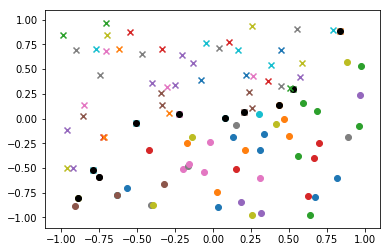

In [75]:
import matplotlib.pyplot as plt
for i in range(npts):
    if ys[i]>0:
        plt.scatter(pts[i][0],pts[i][1],marker='x')
    else:
        plt.scatter(pts[i][0],pts[i][1],marker='o')
    if np.isin(i,svinds):
        plt.scatter(pts[i][0],pts[i][1],marker='o',color='k')
plt.show

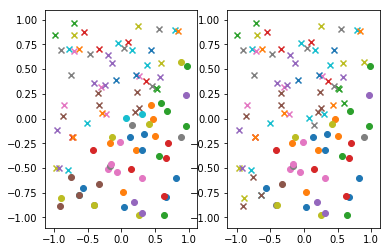

In [76]:
plt.subplot(1,2,1)
for i in range(npts):
    if ys[i]>0:
        plt.scatter(pts[i][0],pts[i][1],marker='x')
    else:
        plt.scatter(pts[i][0],pts[i][1],marker='o')
plt.subplot(1,2,2)
for i in range(npts):
    if outs[i]>0:
        plt.scatter(pts[i][0],pts[i][1],marker='x')
    else:
        plt.scatter(pts[i][0],pts[i][1],marker='o')

1.0

In [186]:
a=4
b=a
a=3
b

4

In [196]:
a=np.array([0,1])
a

array([0, 1])

In [90]:
a=[]
len(a)

0

In [49]:
mat

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])